# K-Means Clustering

## Load Libraries and Data

In [1]:
import io
import requests
import warnings
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_digits
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
import seaborn as sns

# Suppress matplotlib deprecation warnings
warnings.filterwarnings('ignore')

# Make this notebook's output stable across runs
random_state = 1000
np.random.seed(random_state)

# Plot formatting
%matplotlib inline
sns.set()
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Data: Mall Customers

The dataset contains demographic and spending information about a mall's customers.

| Attribute | Description                         |
| --------- | ----------------------------------- |
| ID        | Customer ID                         |
| Gender    | Customer gender                     |
| Age       | Customer age                        |
| Income    | Customer income in thousands        |
| Spend     | Customer spend scaled from 1 to 100 |

In [2]:
url = 'https://raw.githubusercontent.com/natecraig/aiml/main/Data/mall.csv'
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
df.head()

,ID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


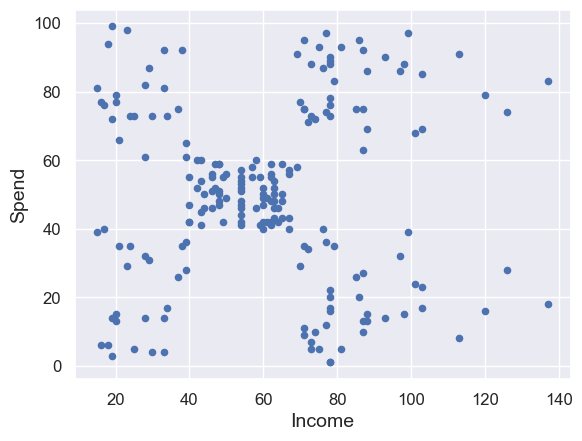

In [3]:
# Plot spend aganist income to assess patterns visually
df.plot.scatter('Income', 'Spend')
plt.show()

## K-Means Clustering: Spend and Income

In [4]:
X = df[['Income', 'Spend']]

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [5]:
# Cluster using 5 clusters
kmeans = KMeans(n_clusters=5, n_init='auto')
kmeans.fit(X_scale)

df['Cluster'] = kmeans.predict(X_scale)

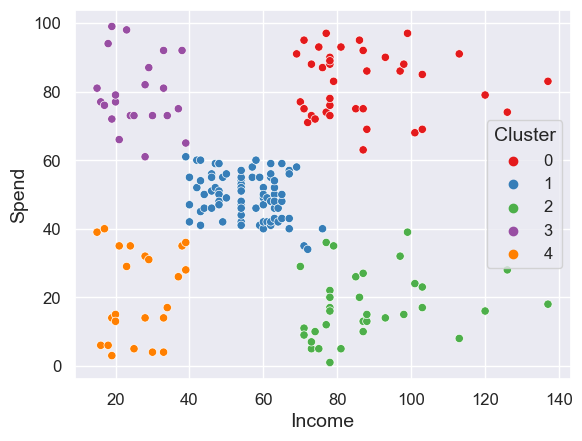

In [6]:
# Plot cluster assignments
sns.scatterplot(data=df, x='Income', y='Spend', hue='Cluster',
                palette='Set1')
plt.legend(title='Cluster', title_fontsize=14, fontsize=12)
plt.show()

In [7]:
# Describe the clusters
df.groupby('Cluster').agg(
    {
        'Income':['mean', 'std'],
        'Spend':['mean', 'std']
    },
axis=1)

Income                 Spend           
              mean        std       mean        std
Cluster                                            
0        86.538462  16.312485  82.128205   9.364489
1        55.296296   8.988109  49.518519   6.530909
2        88.200000  16.399067  17.114286   9.952154
3        25.727273   7.566731  79.363636  10.504174
4        26.304348   7.893811  20.913043  13.017167

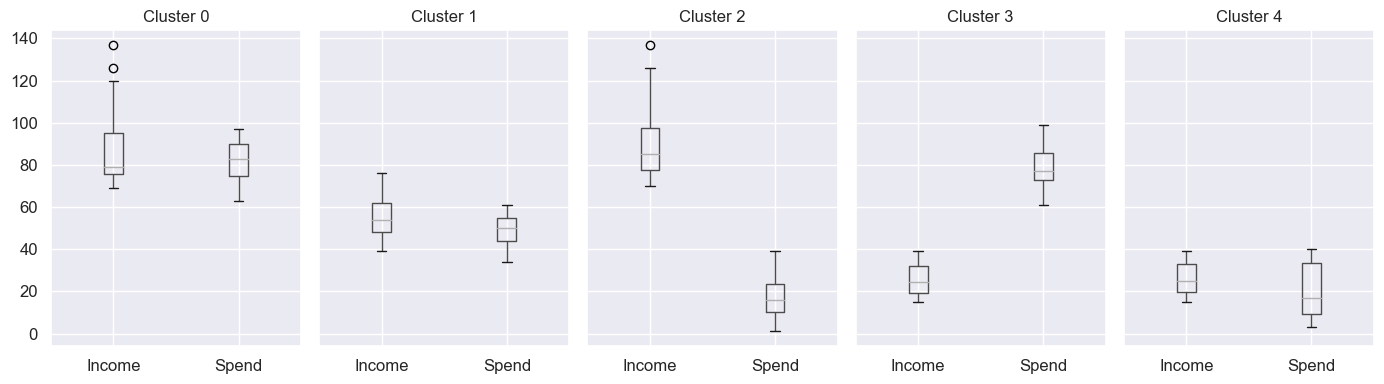

In [8]:
# Visualize cluster distributions
(df.groupby('Cluster')
 .boxplot(column=['Income', 'Spend'], subplots=True,
          layout=(1, 5), figsize=(14, 4)))

fig = plt.gcf()
for i, ax in enumerate(fig.axes):
    ax.set_title(f'Cluster {i}')

plt.tight_layout()
plt.show()

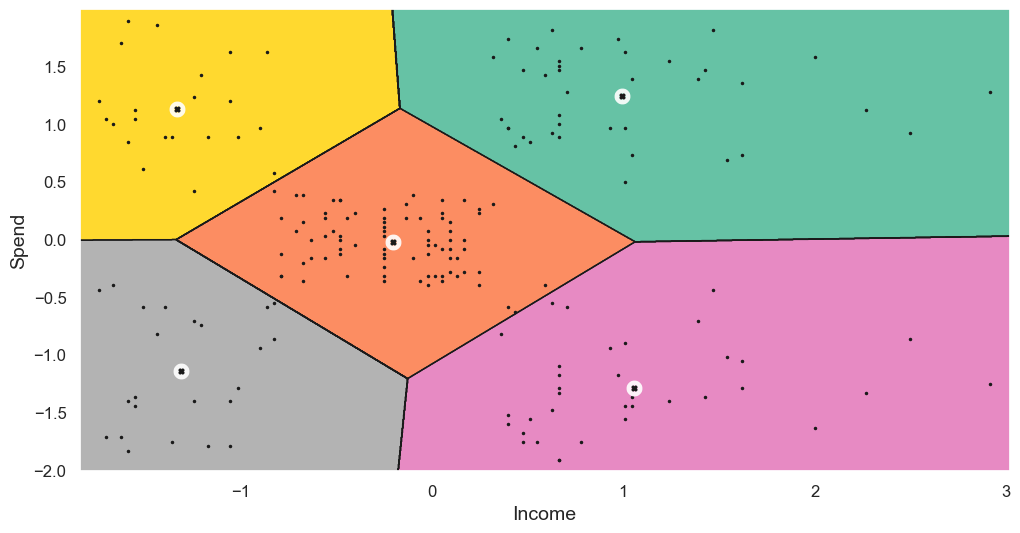

In [9]:
# Visualize the decision boundaries of the KMeans model
def plot_centroids(centroids, weights=None,
                   circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=12, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=12, linewidths=2,
                color=cross_color, zorder=11, alpha=1)

    
def plot_decision_boundaries(clusterer, X, resolution=2000,
                             show_centroids=True, show_xlabels=True,
                             show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap=sns.color_palette('Set2', as_cmap=True))
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=3)
    
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

plt.subplots(figsize=(12, 6))
plot_decision_boundaries(kmeans, X_scale)
plt.xlabel('Income')
plt.ylabel('Spend')
plt.show()

In [10]:
kmeans.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [11]:
# Fit KMeans for different values of k
ks = range(2, 10)
kmeans_per_k = [KMeans(n_clusters=k, random_state=random_state,
                       n_init='auto').fit(X_scale)
                for k in ks]

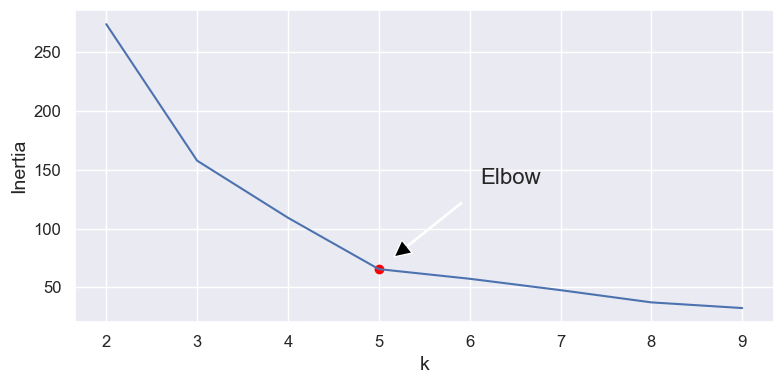

In [12]:
# Plot inertia against k
inertias = [m.inertia_ for m in kmeans_per_k]

plt.subplots(figsize=(8, 4))

plt.plot(ks, inertias)
plt.scatter(5, inertias[3], color='red')

plt.annotate(
    'Elbow', xy=(5, inertias[3]),
    xytext=(0.6, 0.5), textcoords='figure fraction', fontsize=16,
    arrowprops=dict(facecolor='black', width=1, shrink=0.15)
)

plt.xlabel('k')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

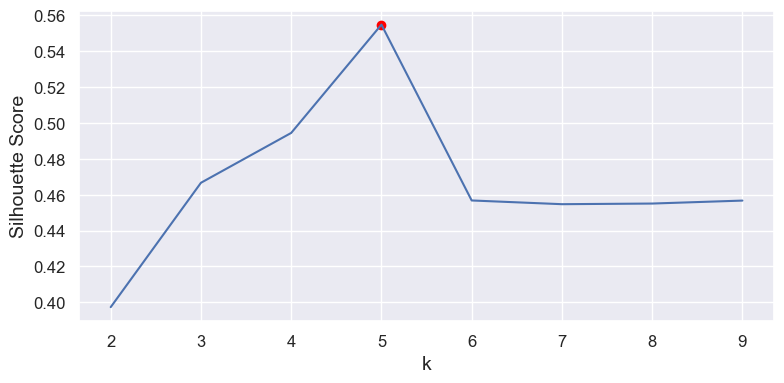

In [13]:
# Plot silhouette score against k
silhouettes = [silhouette_score(X_scale, m.labels_)
               for m in kmeans_per_k]

plt.subplots(figsize=(8, 4))

plt.plot(ks, silhouettes)
plt.scatter(5, silhouettes[3], color='red')

plt.xlabel('k')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

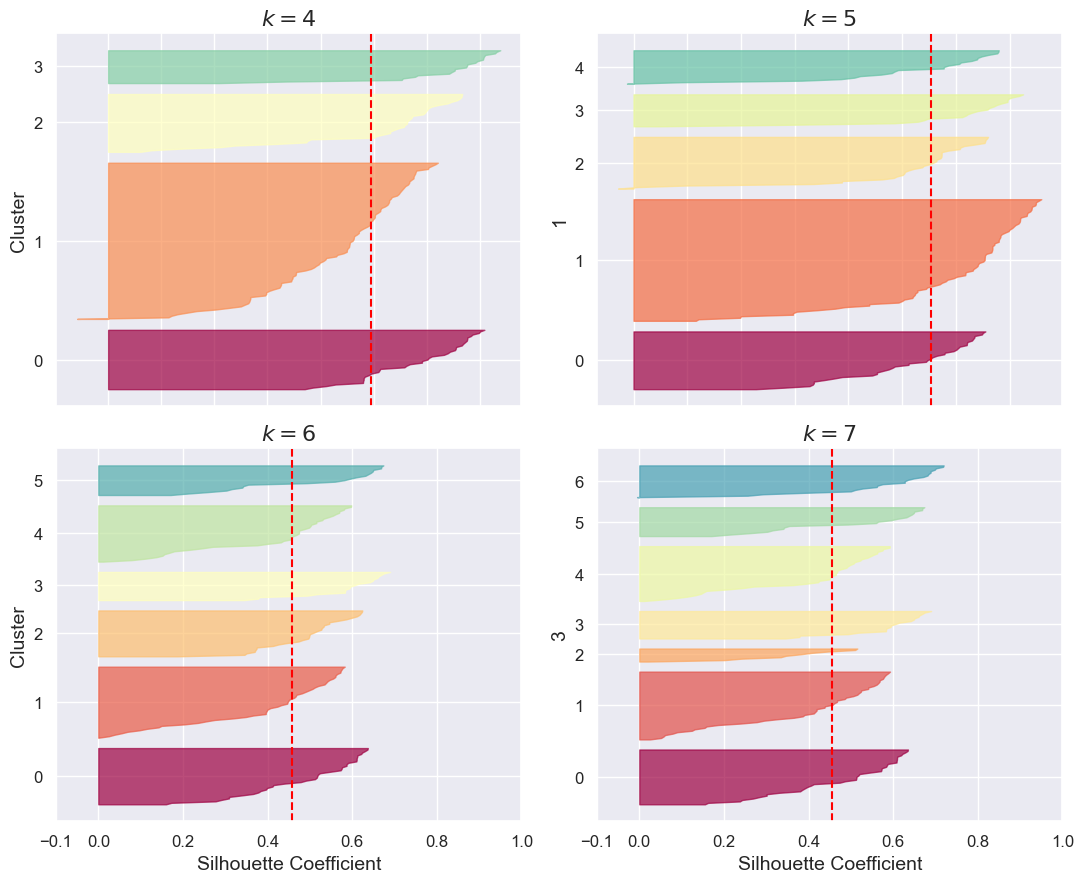

In [14]:
# Plot a silhouette diagram
ks = (4, 5, 6, 7)
kmeans_per_k = [KMeans(n_clusters=k, random_state=random_state,
                       n_init='auto').fit(X_scale)
                for k in ks]
silhouettes = [silhouette_score(X_scale, m.labels_)
               for m in kmeans_per_k]

plt.figure(figsize=(11, 9))

for i, k in enumerate(ks):
    plt.subplot(2, 2, i + 1)
    
    y_pred = kmeans_per_k[i].labels_
    silhouette_coefficients = silhouette_samples(X_scale, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for j in range(k):
        coeffs = silhouette_coefficients[y_pred == j]
        coeffs.sort()

        color = mpl.cm.Spectral(j / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    plt.ylabel(i)
    if i in (0, 2):
        plt.ylabel('Cluster')
    
    if i in (2, 3):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel('Silhouette Coefficient')
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouettes[i], color='red', linestyle='--')
    plt.title('$k={}$'.format(k), fontsize=16)

plt.tight_layout()
plt.show()

### Exercise
Create clusters using all relevant variables (i.e., add age and gender). What value of *k* do you recommend?

Plot the instances and their cluster assignments with income on the horizontal axis and spend on the vertical. Do the clusters match your visual assessment?

## Clustering for Preprocessing, and Using Pipelines

In [15]:
# Load a dataset of handwritten digits
# This dataset is similar to MNIST but smaller (fewer instances and smaller images)
X_digits, y_digits = load_digits(return_X_y=True) 
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits) 

In [16]:
X_train.shape

(1347, 64)

In [17]:
X_train[1,:]

array([ 0.,  0.,  7., 11., 15.,  9.,  0.,  0.,  0.,  0., 15., 15.,  4.,
       11.,  4.,  0.,  0.,  3., 11.,  5.,  0.,  2., 10.,  0.,  0.,  7.,
        8.,  0.,  0.,  3.,  8.,  0.,  0.,  6.,  8.,  0.,  0.,  4.,  8.,
        0.,  0.,  5.,  8.,  0.,  0.,  8.,  5.,  0.,  0.,  1., 12.,  2.,
        1., 13.,  0.,  0.,  0.,  0.,  5., 16., 14.,  3.,  0.,  0.])

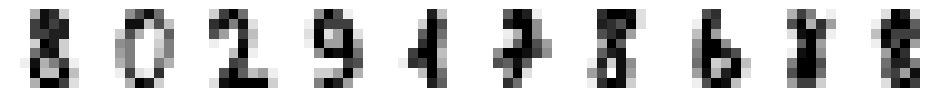

In [18]:
images = 10
plt.subplots(figsize=(12, 3))
for i in range(images):
    ax = plt.subplot(1, 10, i + 1)
    plt.axis('off')
    ax.imshow(X_train[i, :].reshape(8, 8), cmap=plt.cm.gray_r)

plt.show()

In [19]:
# Fit a logistic regression to get baseline performance
log_reg = LogisticRegression(random_state=random_state, solver='newton-cg')
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.96

In [20]:
# Demonstrate a KMeans fit_transform
# The fit_transform gives the distance of each instance to each centroid
kmeans = KMeans(n_clusters=2, random_state=random_state, n_init='auto')
X_trans = kmeans.fit_transform(X_train)
X_trans.shape

(1347, 2)

In [21]:
X_trans[:10]

array([[31.92113627, 28.96033724],
       [40.53209355, 31.97605582],
       [46.53176092, 38.18370399],
       [38.91214173, 28.65436317],
       [33.85306152, 41.47302013],
       [38.08067893, 37.65799293],
       [37.612506  , 33.0085425 ],
       [32.15289942, 41.62909331],
       [31.82930685, 32.91779426],
       [27.4269595 , 29.47215139]])

Note the use of the scikit-learn Pipeline. A pipeline provides a convenient way to channel data from one algorithm to the next.

- The initial and intermediate algorithms must be *transformers* (e.g., scalers, encoders, dimensionality reducers, clusterers).
- The final algorithm must be an *estimator*.


In [22]:
# Create a pipeline that will
# 1. Cluster the training set into 150 clusters and replace the images with their
# distances to the cluster centroids
# 2. Apply a Logistic Regression model

pipeline = Pipeline ([
    ('kmeans', KMeans(n_clusters=150, random_state=random_state,
                      n_init='auto')),
    ('log_reg', LogisticRegression(solver='newton-cg', max_iter=10000,
                                   random_state=random_state))
])

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9711111111111111

### Exercise

Why might using clustering for preprocessing improve the performance of the logistic regression?